In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import re
import  matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import csv

In [2]:
def load_data():
    data = pd.read_csv('output.csv')
    return data

In [3]:
df = pd.read_csv('output.csv')

In [4]:
df

,Label,Data_Bersih
0,1,suka belanja sesuai pesan kali belanja kemas a...
1,1,terima kasih bunga cantik kemas cepat tiba cepat
2,1,baik paket aman lengkap ka bonus terimakasih jual
3,2,rusak
4,1,terimakasih barang
...,...,...
5972,1,harga murah makassar lokasi
5973,3,sayang offline store langung pilih toko
5974,1,cantik bunga terimakasih
5975,1,bunga sesuai ekspektasi langsung pajang ruang ...


In [5]:
import nltk
from nltk.tokenize import word_tokenize
df['token_kata'] = df['Data_Bersih'].apply(lambda x : word_tokenize(x.lower()))
df

,Label,Data_Bersih,token_kata
0,1,suka belanja sesuai pesan kali belanja kemas a...,"[suka, belanja, sesuai, pesan, kali, belanja, ..."
1,1,terima kasih bunga cantik kemas cepat tiba cepat,"[terima, kasih, bunga, cantik, kemas, cepat, t..."
2,1,baik paket aman lengkap ka bonus terimakasih jual,"[baik, paket, aman, lengkap, ka, bonus, terima..."
3,2,rusak,[rusak]
4,1,terimakasih barang,"[terimakasih, barang]"
...,...,...,...
5972,1,harga murah makassar lokasi,"[harga, murah, makassar, lokasi]"
5973,3,sayang offline store langung pilih toko,"[sayang, offline, store, langung, pilih, toko]"
5974,1,cantik bunga terimakasih,"[cantik, bunga, terimakasih]"
5975,1,bunga sesuai ekspektasi langsung pajang ruang ...,"[bunga, sesuai, ekspektasi, langsung, pajang, ..."


In [6]:
#import stopword
from nltk.corpus import stopwords
list_stopwords = list(set(stopwords.words('indonesian')))

list_stopwords.extend(['ka', 'ng', 'bungaa','krg','langung', 'atidak'])
list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
  
df['hasil_preprocessing'] = df['token_kata'].apply(stopwords_removal)
df

,Label,Data_Bersih,token_kata,hasil_preprocessing
0,1,suka belanja sesuai pesan kali belanja kemas a...,"[suka, belanja, sesuai, pesan, kali, belanja, ...","[suka, belanja, sesuai, pesan, kali, belanja, ..."
1,1,terima kasih bunga cantik kemas cepat tiba cepat,"[terima, kasih, bunga, cantik, kemas, cepat, t...","[terima, kasih, bunga, cantik, kemas, cepat, c..."
2,1,baik paket aman lengkap ka bonus terimakasih jual,"[baik, paket, aman, lengkap, ka, bonus, terima...","[paket, aman, lengkap, bonus, terimakasih, jual]"
3,2,rusak,[rusak],[rusak]
4,1,terimakasih barang,"[terimakasih, barang]","[terimakasih, barang]"
...,...,...,...,...
5972,1,harga murah makassar lokasi,"[harga, murah, makassar, lokasi]","[harga, murah, makassar, lokasi]"
5973,3,sayang offline store langung pilih toko,"[sayang, offline, store, langung, pilih, toko]","[sayang, offline, store, pilih, toko]"
5974,1,cantik bunga terimakasih,"[cantik, bunga, terimakasih]","[cantik, bunga, terimakasih]"
5975,1,bunga sesuai ekspektasi langsung pajang ruang ...,"[bunga, sesuai, ekspektasi, langsung, pajang, ...","[bunga, sesuai, ekspektasi, langsung, pajang, ..."


In [7]:
import ast

def convert_text_list(text):
    texts = ast.literal_eval(str(text))
    return text

df["data_list"] = df["hasil_preprocessing"].apply(convert_text_list)


print(df["data_list"][0])

print("\ntype : ", type(df["data_list"][0]))

['suka', 'belanja', 'sesuai', 'pesan', 'kali', 'belanja', 'kemas', 'aman', 'kirim', 'cepat']

type :  <class 'list'>


In [8]:
def calc_TF(shopee_review):
    TF_dict = {}
    for term in shopee_review :
        if term in TF_dict :
            TF_dict[term] += 1
        else :
            TF_dict[term] = 1
    for term in TF_dict :
        TF_dict[term] = TF_dict[term] / len(shopee_review)
    return TF_dict

df['TF_dict'] = df['data_list'].apply(calc_TF)
df['TF_dict']

0       {'suka': 0.1, 'belanja': 0.2, 'sesuai': 0.1, '...
1       {'terima': 0.14285714285714285, 'kasih': 0.142...
2       {'paket': 0.16666666666666666, 'aman': 0.16666...
3                                          {'rusak': 1.0}
4                     {'terimakasih': 0.5, 'barang': 0.5}
                              ...                        
5972    {'harga': 0.25, 'murah': 0.25, 'makassar': 0.2...
5973    {'sayang': 0.2, 'offline': 0.2, 'store': 0.2, ...
5974    {'cantik': 0.3333333333333333, 'bunga': 0.3333...
5975    {'bunga': 0.125, 'sesuai': 0.125, 'ekspektasi'...
5976    {'cocok': 0.1111111111111111, 'crafter': 0.111...
Name: TF_dict, Length: 5977, dtype: object

In [9]:
index = 0

print('%20s' % 'term', '\t', 'TF\n')
for key in df['TF_dict'][index]:
      print('%20s' % key, '\t', df['TF_dict'][index][key])

                term 	 TF

                suka 	 0.1
             belanja 	 0.2
              sesuai 	 0.1
               pesan 	 0.1
                kali 	 0.1
               kemas 	 0.1
                aman 	 0.1
               kirim 	 0.1
               cepat 	 0.1


In [10]:
def calc_DF(tfDict) :
    count_DF = {}
    for shopee_review in tfDict:
        for term in shopee_review :
            if term in count_DF :
                count_DF[term] +=1
            else :
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df['TF_dict'])
print(DF)

{'suka': 343, 'belanja': 321, 'sesuai': 725, 'pesan': 706, 'kali': 297, 'kemas': 1010, 'aman': 312, 'kirim': 999, 'cepat': 1100, 'terima': 321, 'kasih': 286, 'bunga': 1212, 'cantik': 426, 'paket': 234, 'lengkap': 198, 'bonus': 37, 'terimakasih': 383, 'jual': 616, 'rusak': 37, 'barang': 662, 'langgan': 420, 'moga': 189, 'toko': 262, 'murah': 711, 'update': 3, 'bagus': 1689, 'kirain': 19, 'ngembangtapi': 1, 'kuncuptapi': 1, 'makasih': 213, 'shopeee': 53, 'kualitas': 1202, 'produk': 571, 'harga': 1164, 'respon': 267, 'sederhanameski': 1, 'plastik': 37, 'lumayan': 215, 'kkemas': 34, 'mantap': 170, 'kilat': 13, 'ramah': 161, 'recommended': 66, 'bungabunganya': 2, 'jangkau': 227, 'ok': 155, 'ndk': 1, 'kecewa': 140, 'deskripsi': 39, 'foto': 73, 'oke': 264, 'uda': 15, 'standar': 63, 'rapih': 136, 'beli': 248, 'tahan': 31, 'saing': 12, 'sedia': 7, 'grosir': 4, 'da': 11, 'mantul': 13, 'asli': 122, 'gambar': 183, 'pilih': 20, 'kerennn': 6, 'syukur': 234, 'te': 14, 'meriahhh': 3, 'next': 131, 'tim

In [11]:
n_document = len(df)

def calc_IDF(__n_document, __DF) :
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = (__n_document / (__DF[term])) 
    return IDF_Dict

NDF = calc_IDF(n_document, DF)

In [12]:
print(NDF)

{'suka': 17.425655976676385, 'belanja': 18.61993769470405, 'sesuai': 8.244137931034484, 'pesan': 8.46600566572238, 'kali': 20.124579124579125, 'kemas': 5.917821782178218, 'aman': 19.15705128205128, 'kirim': 5.982982982982983, 'cepat': 5.433636363636364, 'terima': 18.61993769470405, 'kasih': 20.8986013986014, 'bunga': 4.931518151815181, 'cantik': 14.030516431924882, 'paket': 25.542735042735043, 'lengkap': 30.18686868686869, 'bonus': 161.54054054054055, 'terimakasih': 15.605744125326371, 'jual': 9.702922077922079, 'rusak': 161.54054054054055, 'barang': 9.028700906344412, 'langgan': 14.230952380952381, 'moga': 31.624338624338623, 'toko': 22.81297709923664, 'murah': 8.40646976090014, 'update': 1992.3333333333333, 'bagus': 3.538780343398461, 'kirain': 314.57894736842104, 'ngembangtapi': 5977.0, 'kuncuptapi': 5977.0, 'makasih': 28.061032863849764, 'shopeee': 112.77358490566037, 'kualitas': 4.972545757071547, 'produk': 10.467600700525393, 'harga': 5.134879725085911, 'respon': 22.3857677902621

In [13]:
import math
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = math.log(__n_document / (__DF[term]))
    return IDF_Dict

IDF = calc_IDF(n_document, DF)

In [14]:
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

df['TF-IDF_dict'] = df['TF_dict'].apply(calc_TF_IDF)

In [15]:
df['TF_dict'][0]

{'suka': 0.1,
 'belanja': 0.2,
 'sesuai': 0.1,
 'pesan': 0.1,
 'kali': 0.1,
 'kemas': 0.1,
 'aman': 0.1,
 'kirim': 0.1,
 'cepat': 0.1}

In [16]:
df['TF-IDF_dict']

0       {'suka': 0.28579436016583143, 'belanja': 0.584...
1       {'terima': 0.41774756081346254, 'kasih': 0.434...
2       {'paket': 0.5400588222444254, 'aman': 0.492111...
3                           {'rusak': 5.0847561361800295}
4       {'terimakasih': 1.373819529821804, 'barang': 1...
                              ...                        
5972    {'harga': 0.4090141051332178, 'murah': 0.53225...
5973    {'sayang': 0.9376681727183567, 'offline': 1.46...
5974    {'cantik': 0.8804115675182946, 'bunga': 0.5318...
5975    {'bunga': 0.19945586027437429, 'sesuai': 0.263...
5976    {'cocok': 0.5959410598498944, 'crafter': 0.966...
Name: TF-IDF_dict, Length: 5977, dtype: object

In [56]:
index = 2

print('%20s' % 'term', '\t', '%10s' % 'TF', '\t', '%10s' % 'TF-IDF\n')
for key in df['TF-IDF_dict'][index]:
    print('%20s' % key, '\t','%10s'% df['TF_dict'][index][key] , '\t', df['TF-IDF_dict'][index][key])

                term 	         TF 	    TF-IDF

               paket 	 0.16666666666666666 	 0.5400588222444254
                aman 	 0.16666666666666666 	 0.49211181016912864
             lengkap 	 0.16666666666666666 	 0.5679011696882865
               bonus 	 0.16666666666666666 	 0.8474593560300049
         terimakasih 	 0.16666666666666666 	 0.45793984327393467
                jual 	 0.16666666666666666 	 0.37873784754845574


In [18]:
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)
    
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df['TF_IDF_Vec'] = df['TF-IDF_dict'].apply(calc_TF_IDF_Vec)

print ('Menampilkan baris pertama matrix TF_IDF_Vec Series\n')
print(df['TF_IDF_Vec'][0])

print('\n matrix size :', len(df['TF_IDF_Vec'][0]))

Menampilkan baris pertama matrix TF_IDF_Vec Series

[0.0, 0.0, 0.0, 0.0, 0.16926085900377924, 0.17779684389889494, 0.17889192701757006, 0.21095023939695798, 0.0, 0.2136058811331012, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28579436016583143, 0.5848465851388477, 0.0, 0.29526708610147717, 0.3001941910021555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

 matrix size : 50


In [19]:
TF_IDF_Vec_List = np.array(df['TF_IDF_Vec'].to_list())

sums = TF_IDF_Vec_List.sum(axis = 0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term/kata', 'rank'])
ranking.sort_values('rank', ascending=False)

,term/kata,rank
0,bagus,494.668947
2,kualitas,384.319690
3,harga,374.673296
1,bunga,363.332727
5,kemas,348.153657
4,cepat,326.506715
8,murah,306.720896
12,produk,272.326108
7,sesuai,269.351201
6,kirim,267.719798


In [20]:
df = df.astype({'Label' : 'category'})
df = df.astype({'Data_Bersih' : 'string'})
df = df.astype({'hasil_preprocessing' : 'string'})
df.dtypes

Label                  category
Data_Bersih              string
token_kata               object
hasil_preprocessing      string
data_list                object
TF_dict                  object
TF-IDF_dict              object
TF_IDF_Vec               object
dtype: object

In [21]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

df["data_join"] = df["hasil_preprocessing"].apply(join_text_list)


df["data_join"].head()

0    suka belanja sesuai pesan kali belanja kemas a...
1          terima kasih bunga cantik kemas cepat cepat
2            paket aman lengkap bonus terimakasih jual
3                                                rusak
4                                   terimakasih barang
Name: data_join, dtype: object

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

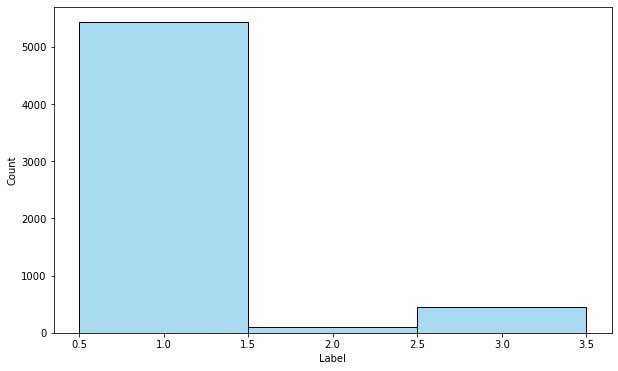

In [23]:
#visualisasi data
fig,axes = plt.subplots(1,1,figsize=(10,6))

sns.histplot(data=df, x='Label',ax=axes,color='skyblue')
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

tvec = CountVectorizer()
X_cVec = tvec.fit_transform(df['hasil_preprocessing'].values.astype('U'))
print(X_cVec)
h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(X_cVec)
print(x_tfidf)

  (0, 2763)	1
  (0, 341)	2
  (0, 2625)	1
  (0, 2190)	1
  (0, 1315)	1
  (0, 1376)	1
  (0, 66)	1
  (0, 1417)	1
  (0, 637)	1
  (1, 1376)	1
  (1, 637)	2
  (1, 2891)	1
  (1, 1334)	1
  (1, 527)	1
  (1, 609)	1
  (2, 66)	1
  (2, 2086)	1
  (2, 1581)	1
  (2, 461)	1
  (2, 2895)	1
  (2, 1277)	1
  (3, 2453)	1
  (4, 2895)	1
  (4, 296)	1
  (5, 1545)	1
  :	:
  (5973, 2983)	1
  (5973, 2222)	1
  (5973, 2539)	1
  (5973, 2755)	1
  (5973, 2001)	1
  (5974, 527)	1
  (5974, 609)	1
  (5974, 2895)	1
  (5975, 2625)	1
  (5975, 527)	1
  (5975, 1555)	1
  (5975, 917)	1
  (5975, 1110)	1
  (5975, 2081)	1
  (5975, 2446)	1
  (5975, 2841)	1
  (5976, 527)	1
  (5976, 1277)	1
  (5976, 345)	1
  (5976, 2987)	1
  (5976, 507)	1
  (5976, 704)	1
  (5976, 1439)	1
  (5976, 713)	1
  (5976, 2178)	1
  (0, 2763)	0.3145882222390858
  (0, 2625)	0.25363973927678873
  (0, 2190)	0.2558037451688077
  (0, 1417)	0.22751066347755125
  (0, 1376)	0.2266179532241674
  (0, 1315)	0.3263018992372524
  (0, 637)	0.2196591066524788
  (0, 341)	0.63996248

In [25]:
x_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
# terjadi imbalance dataset. maka digunakan algoritma smote untuk menyeimbangkan data

from imblearn.over_sampling import SMOTE



In [27]:
# X adalah shopee Review / Data Bersih
# Y adalah Label

x = x_tfidf
y = df['Label']

In [28]:
#sebelum di smote

print(x.shape)
print(y.shape)

(5977, 3177)
(5977,)


In [29]:
print(y)

0       1
1       1
2       1
3       2
4       1
       ..
5972    1
5973    3
5974    1
5975    1
5976    1
Name: Label, Length: 5977, dtype: category
Categories (3, int64): [1, 2, 3]


In [30]:
total_data = list(y)
status = []
total_positif = total_negatif = total_netral = total = 0
for label in total_data :
    if label == 1 :
        total_positif += 1
        status.append('Positif')
    elif label == 3 :
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')
        
    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data = {total}')

Hasil Analisis Data:
Positif = 5432
Netral = 448
Negatif = 97

Total Data = 5977


In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from sklearn.datasets import make_classification
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(x, y)

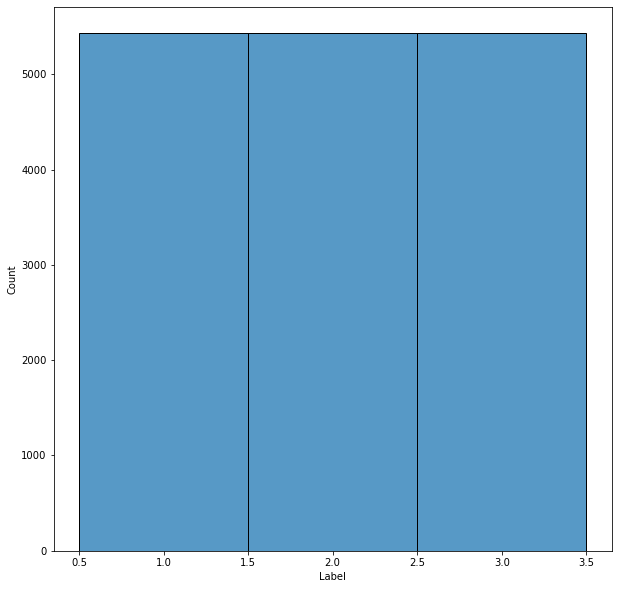

In [32]:
fig = plt.subplots(figsize=(10,10))
sns.histplot(data=y_res)
plt.show()

In [33]:
print(x_res.shape)
print(y_res.shape)

(16296, 3177)
(16296,)


In [34]:
total_data = list(y_res)
status = []
total_positif = total_negatif = total_netral = total = 0
for label in total_data :
    if label == 1 :
        total_positif += 1
        status.append('Positif')
    elif label == 3 :
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')
        
    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data = {total}')

Hasil Analisis Data:
Positif = 5432
Netral = 5432
Negatif = 5432

Total Data = 16296


In [35]:
from sklearn.model_selection import train_test_split

x_res, x_test, y_res, y_test = train_test_split(x_res, y_res, test_size=0.1, random_state=42)
 

print(x_res.shape)
print(x_test.shape)
print(y_res.shape)
print(y_test.shape)

(14666, 3177)
(1630, 3177)
(14666,)
(1630,)


In [36]:
data_testing = list(y_test)
status = []
total_positif = total_negatif = total_netral = total = 0
for label in data_testing :
    if label == 1 :
        total_positif += 1
        status.append('Positif')
    elif label == 3 :
        total_netral += 1
        status.append('Netral')
    else: 
        total_negatif += 1
        status.append('Negatif')
        
    total += 1

print(f'Data Testing:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data = {total}')

Data Testing:
Positif = 528
Netral = 541
Negatif = 561

Total Data = 1630


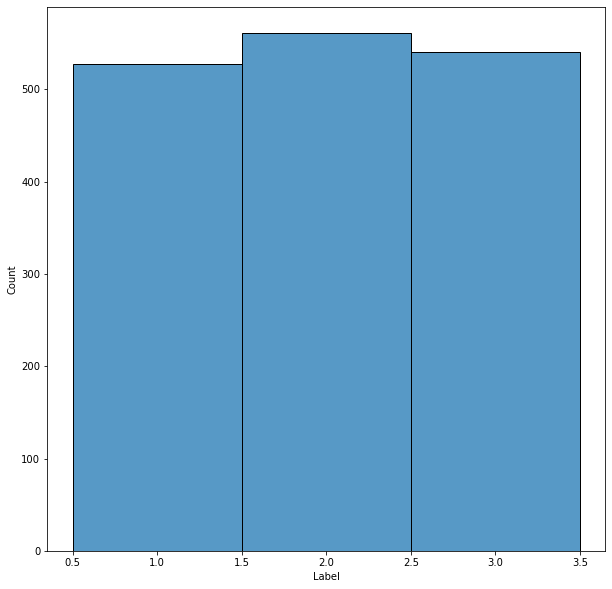

In [37]:
fig = plt.subplots(figsize=(10,10))
sns.histplot(data=y_test)
plt.show()

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

NB = MultinomialNB(alpha=.01)
NB.fit(x_res, y_res)

pred_NB = NB.predict(x_test)
metrics.f1_score(y_test, pred_NB, average='micro')

0.9374233128834356

In [39]:
import nltk
from sklearn import metrics

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(x_res, y_res)
predicted = clf.predict(x_test)
print('MultinomialNB Accuracy :', accuracy_score(y_test, predicted))
print('MultinomialNB Precision :', precision_score(y_test, predicted, average = 'micro'))
print('MultinomialNB Recall :', recall_score(y_test, predicted, average = 'micro'))
print('MultinomialNB f1_score :', f1_score(y_test, predicted, average = 'micro'))

print(f'confusion matrix :\n {confusion_matrix(y_test, predicted)}')
print('=====================================\n')
print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy : 0.9190184049079755
MultinomialNB Precision : 0.9190184049079755
MultinomialNB Recall : 0.9190184049079755
MultinomialNB f1_score : 0.9190184049079755
confusion matrix :
 [[473  25  30]
 [  5 549   7]
 [ 36  29 476]]

              precision    recall  f1-score   support

           1       0.92      0.90      0.91       528
           2       0.91      0.98      0.94       561
           3       0.93      0.88      0.90       541

    accuracy                           0.92      1630
   macro avg       0.92      0.92      0.92      1630
weighted avg       0.92      0.92      0.92      1630



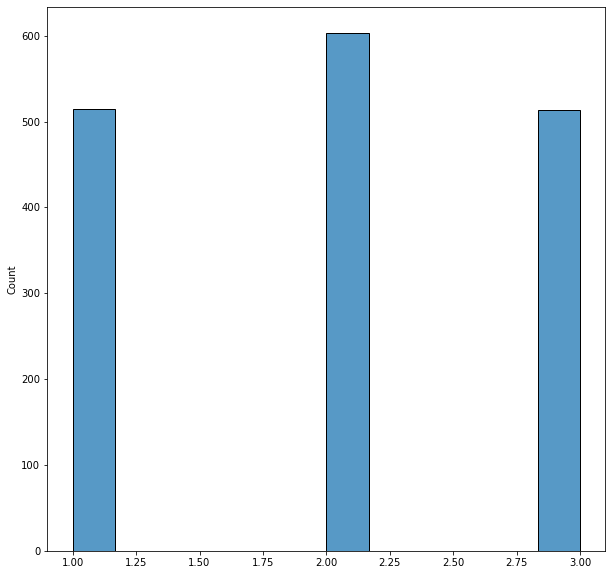

In [41]:
fig = plt.subplots(figsize=(10,10))
sns.histplot(data=clf.predict(x_test))
plt.show()

In [42]:
data_testing = list(clf.predict(x_test))
status = []
total_positif = total_negatif = total_netral = total = 0

for label in data_testing :
    if label == 1 :
        total_positif += 1
        status.append('Positif')
    elif label == 3 :
        total_netral += 1
        status.append('Netral')
    else: 
        total_negatif += 1
        status.append('Negatif')
        
    total += 1

print(f'Hasil Klasifikasi Bayes:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data = {total}')

Hasil Klasifikasi Bayes:
Positif = 514
Netral = 513
Negatif = 603

Total Data = 1630


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

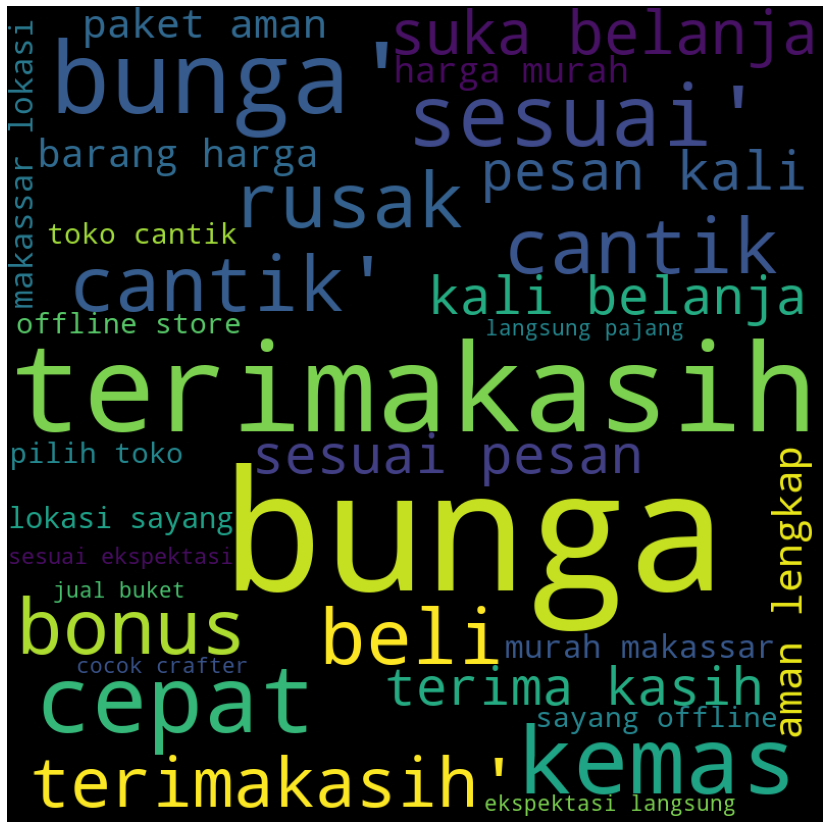

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words =1000, min_font_size = 20).generate(str(df))

fig = plt.figure(figsize =(15,15),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()